In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    """
    A simple single-layer perceptron implementation.
    
    Parameters
    ----------
    learning_rate : float
        The step size for weight updates (default 0.01).
    n_iters : int
        The number of passes over the training dataset (epochs).
        
    Attributes
    ----------
    weights : 1d-array
        Weights after fitting the model.
    bias : scalar
        Bias term after fitting the model.
    """
    
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0

    def _step_function(self, x):
        """Applies the Heaviside step function."""
        # np.where(condition, value_if_true, value_if_false)
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        """
        Train the perceptron on the training data.
        
        Parameters
        ----------
        X : 2d-array, shape = [n_samples, n_features]
            Training vectors.
        y : 1d-array, shape = [n_samples]
            Target values (binary, 0 or 1).
        """
        n_samples, n_features = X.shape
        
        # Initialize weights to zeros
        self.weights = np.zeros(n_features)
        
        # Run the training loop for n_iters
        for _ in range(self.n_iters):
            # Iterate over each training sample
            for idx, x_i in enumerate(X):
                # 1. Calculate the weighted sum (forward pass)
                linear_output = np.dot(x_i, self.weights) + self.bias
                
                # 2. Make a prediction
                y_predicted = self._step_function(linear_output)
                
                # 3. Calculate the error
                error = y[idx] - y_predicted
                
                # 4. Apply the perceptron learning rule (weight updates)
                update = self.learning_rate * error
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        """
        Make predictions (forward pass) for new data.
        
        Parameters
        ----------
        X : 2d-array, shape = [n_samples, n_features]
            Data to make predictions on.
            
        Returns
        -------
        1d-array
            Predicted class labels (0 or 1).
        """
        # This is the full forward pass: z = w*x + b
        linear_output = np.dot(X, self.weights) + self.bias
        return self._step_function(linear_output)

Input data:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
True labels:    [0 1 1 1]
Predictions:  [0 1 1 1]

Final weights: [0.1 0.1]
Final bias:    -0.1


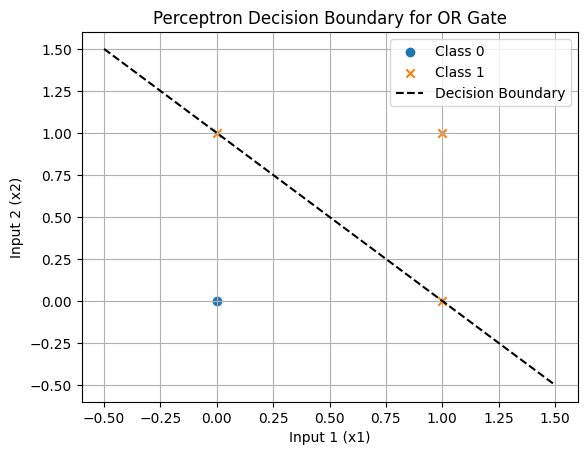

In [2]:
# 1. Create a linearly separable dataset (OR Gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1]) # OR logic

# 2. Instantiate and train the perceptron
p = Perceptron(learning_rate=0.1, n_iters=100)
p.fit(X, y)

# 3. Make predictions
predictions = p.predict(X)
print(f"Input data:\n{X}")
print(f"True labels:    {y}")
print(f"Predictions:  {predictions}")

# 4. Visualization
print(f"\nFinal weights: {p.weights}")
print(f"Final bias:    {p.bias}")

fig, ax = plt.subplots()

# Plot data points
# y == 0 are '0's, y == 1 are '1's
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', label='Class 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='x', label='Class 1')

# Calculate and plot the decision boundary
# The boundary is where w1*x1 + w2*x2 + b = 0
# We can solve for x2: x2 = (-w1*x1 - b) / w2
x1_min_max = np.array([np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5])
# Avoid division by zero if a weight is 0 (though unlikely here)
if p.weights[1] != 0:
    x2_boundary = (-p.weights[0] * x1_min_max - p.bias) / p.weights[1]
    ax.plot(x1_min_max, x2_boundary, 'k--', label='Decision Boundary')

ax.set_title("Perceptron Decision Boundary for OR Gate")
ax.set_xlabel("Input 1 (x1)")
ax.set_ylabel("Input 2 (x2)")
ax.legend()
ax.grid(True)
plt.show()